<a href="https://colab.research.google.com/github/furkanoruc/survey_analysis/blob/main/survey_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import itertools
import os
import sys

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import base64

# Plotly imports
import plotly.offline as py
import plotly.graph_objs as go
# Set notebook mode to work in offline
py.init_notebook_mode()

#py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import scipy

# Other imports
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import nltk
from wordcloud import WordCloud, STOPWORDS


In [ ]:
# Importing the file & observing the head
df = pd.read_excel("Data to be Dug into.xlsx")
df.head()

responseid Anonymous Company  \
0  Unique respondent ID; one ID per respondent; m...           Company   
1                                                 44           Dunkin'   
2                                                 44            Google   
3                                                 46           Comcast   
4                                                 46        Sam's Club   

                            Industry  \
0  What industry is this company in?   
1                         Restaurant   
2                         Technology   
3                 Telecommunications   
4        Warehouse Clubs or Discount   

                             Likelihood to Recommend  \
0  Basis of Net Promoter Score; "How likely are y...   
1                                                 10   
2                                                  6   
3                                                  9   
4                                                  7   

                            Emotional Relationship 1  \
0  Series of questions about the company; extent ...   
1                                                 10   
2                                                 10   
3                                                  8   
4                                                  5   

   Emotional Relationship 2  Emotional Relationship 3  \
0                       NaN                       NaN   
1                      10.0                       0.0   
2                      10.0                       0.0   
3                       8.0                       8.0   
4                       5.0                       5.0   

   Emotional Relationship 4  Emotional Relationship 5  \
0                       NaN                       NaN   
1                       0.0                      10.0   
2                       0.0                      10.0   
3                       8.0                       9.0   
4                       5.0                       5.0   

   Emotional Relationship 6  ...  \
0                       NaN  ...   
1                       5.0  ...   
2                       0.0  ...   
3                       5.0  ...   
4                       5.0  ...   

     Authentically engaged in protecting environment  \
0  Environment - Series of questions about the co...   
1                                                  0   
2                                                  0   
3                                                  5   
4                                                  5   

                Doing enough to stop spread of COVID  \
0  COVID Response - Series of questions about the...   
1                                                 10   
2                                                 10   
3                                                  5   
4                                                  5   

   Innovative to meet needs during COVID  \
0                                    NaN   
1                                    5.0   
2                                    0.0   
3                                    5.0   
4                                    5.0   

   Prioritizes employee safety during COVID  \
0                                       NaN   
1                                       5.0   
2                                       5.0   
3                                       5.0   
4                                       5.0   

   Keeps customers informed during COVID  Donated money to COVID efforts  \
0                                    NaN                             NaN   
1                                    5.0                            10.0   
2                                    5.0                            10.0   
3                                    5.0                             5.0   
4                                    5.0                             5.0   

                                    Have recommended  \
0  Have you recommended this company to some

# Data Cleaning

In [ ]:
# Dropping 0 index since explanations are not needed
df.drop([0], inplace = True)
df.head()

responseid Anonymous Company                     Industry  \
1         44           Dunkin'                   Restaurant   
2         44            Google                   Technology   
3         46           Comcast           Telecommunications   
4         46        Sam's Club  Warehouse Clubs or Discount   
5         47              Zoom                   Technology   

  Likelihood to Recommend Emotional Relationship 1  Emotional Relationship 2  \
1                      10                       10                      10.0   
2                       6                       10                      10.0   
3                       9                        8                       8.0   
4                       7                        5                       5.0   
5                       8                        7                       8.0   

   Emotional Relationship 3  Emotional Relationship 4  \
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       8.0                       8.0   
4                       5.0                       5.0   
5                       7.0                       6.0   

   Emotional Relationship 5  Emotional Relationship 6  ...  \
1                      10.0                       5.0  ...   
2                      10.0                       0.0  ...   
3                       9.0                       5.0  ...   
4                       5.0                       5.0  ...   
5                       6.0                       7.0  ...   

   Authentically engaged in protecting environment  \
1                                                0   
2                                                0   
3                                                5   
4                                                5   
5                                                7   

   Doing enough to stop spread of COVID  \
1                                    10   
2                                    10   
3                                     5   
4                                     5   
5                                     6   

   Innovative to meet needs during COVID  \
1                                    5.0   
2                                    0.0   
3                                    5.0   
4                                    5.0   
5                                    7.0   

   Prioritizes employee safety during COVID  \
1                                       5.0   
2                                       5.0   
3                                       5.0   
4                                       5.0   
5                                       7.0   

   Keeps customers informed during COVID  Donated money to COVID efforts  \
1                                    5.0                            10.0   
2                                    5.0                            10.0   
3                                    5.0                             5.0   
4                                    5.0                             5.0   
5                                    8.0                             8.0   

   Have recommended  Have discouraged  \
1                No                No   
2               Yes                No   
3               Yes                No   
4               Yes                No   
5                No                No   

                         Have recommended - open end  \
1                                                NaN   
2  I have a great Google printer. Easy to load pa...   
3                      They have taken care of me/us   
4                              Nothing in particular   
5                                                NaN   

   Have discouraged - open end  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN  
5                          NaN  

[5 rows x 32 columns]

In [ ]:
df.info()
# Observing that there is a single record with empty scores & open ended questions are partially answered.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41446 entries, 1 to 41446
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   responseid                                         41446 non-null  object 
 1   Anonymous Company                                  41446 non-null  object 
 2   Industry                                           41446 non-null  object 
 3   Likelihood to Recommend                            41445 non-null  object 
 4   Emotional Relationship 1                           41445 non-null  object 
 5   Emotional Relationship 2                           41445 non-null  float64
 6   Emotional Relationship 3                           41445 non-null  float64
 7   Emotional Relationship 4                           41445 non-null  float64
 8   Emotional Relationship 5                           41445 non-null  float64
 9   Emotio

In [ ]:
df.dropna(subset = ["Likelihood to Recommend"], inplace = True)
# Dropping the fully empty record
df.drop_duplicates(inplace = True)
# Dropping fully duplicate rows, if possible
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 1 to 41446
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   responseid                                         41445 non-null  object 
 1   Anonymous Company                                  41445 non-null  object 
 2   Industry                                           41445 non-null  object 
 3   Likelihood to Recommend                            41445 non-null  object 
 4   Emotional Relationship 1                           41445 non-null  object 
 5   Emotional Relationship 2                           41445 non-null  float64
 6   Emotional Relationship 3                           41445 non-null  float64
 7   Emotional Relationship 4                           41445 non-null  float64
 8   Emotional Relationship 5                           41445 non-null  float64
 9   Emotio

In [ ]:
# Transforming object columns to floats
df["Emotional Relationship 1"] = df["Emotional Relationship 1"].astype(float)
df["Likelihood to Recommend"] = df["Likelihood to Recommend"].astype(float)
df["Authentic diversity and inclusion ally"] = df["Authentic diversity and inclusion ally"].astype(float)
df["Authentically engaged in protecting environment"] = df["Authentically engaged in protecting environment"].astype(float)
df["Doing enough to stop spread of COVID"] = df["Doing enough to stop spread of COVID"].astype(float)


In [ ]:
# Check if any of the columns are outside 0-10 range

df.describe()

Likelihood to Recommend  Emotional Relationship 1  \
count             41445.000000              41445.000000   
mean                  7.240463                  6.298685   
std                   2.620301                  2.722121   
min                   0.000000                  0.000000   
25%                   5.000000                  5.000000   
50%                   8.000000                  6.000000   
75%                  10.000000                  8.000000   
max                  10.000000                 10.000000   

       Emotional Relationship 2  Emotional Relationship 3  \
count              41445.000000              41445.000000   
mean                   6.189311                  5.799590   
std                    2.707799                  2.832542   
min                    0.000000                  0.000000   
25%                    5.000000                  4.000000   
50%                    6.000000                  6.000000   
75%                    8.000000                  8.000000   
max                   10.000000                 10.000000   

       Emotional Relationship 4  Emotional Relationship 5  \
count              41445.000000              41445.000000   
mean                   6.227748                  6.424925   
std                    2.644361                  2.683636   
min                    0.000000                  0.000000   
25%                    5.000000                  5.000000   
50%                    6.000000                  7.000000   
75%                    8.000000                  9.000000   
max                   10.000000                 10.000000   

       Emotional Relationship 6  Emotional Relationship 7  \
count              41445.000000              41445.000000   
mean                   6.120811                  6.034793   
std                    2.697529                  2.851942   
min                    0.000000                  0.000000   
25%                    5.000000                  5.000000   
50%                    6.000000                  6.000000   
75%                    8.000000                  8.000000   
max                   10.000000                 10.000000   

       Emotional Relationship 8  Emotional Relationship 9  ...  \
count              41445.000000              41445.000000  ...   
mean                   6.059452                  6.828158  ...   
std                    2.836764                  2.602100  ...   
min                    0.000000                  0.000000  ...   
25%                    5.000000                  5.000000  ...   
50%                    6.000000                  7.000000  ...   
75%                    8.000000                  9.000000  ...   
max                   10.000000                 10.000000  ...   

       Emotional Relationship 15  Emotional Relationship 16  \
count               41445.000000               41445.000000   
mean                    6.295524                   6.270286   
std                     2.662562                   2.720111   
min                     0.000000                   0.000000   
25%                     5.000000                   5.000000   
50%                     6.000000                   6.000000   
75%                     8.000000                   8.000000   
max                    10.000000                  10.000000   

       Authentic diversity and inclusion ally  \
count                            41445.000000   
mean                                 6.378646   
std                                  2.540811   
min                                  0.000000   
25%                                  5.000000   
50%                                  6.000000   
75%                                  8.000000   
max                                 10.000000   

       Reputation for supporting diversity and inclusion  \
count                                       41445.000000   
mean                                            6.399131   
std                            

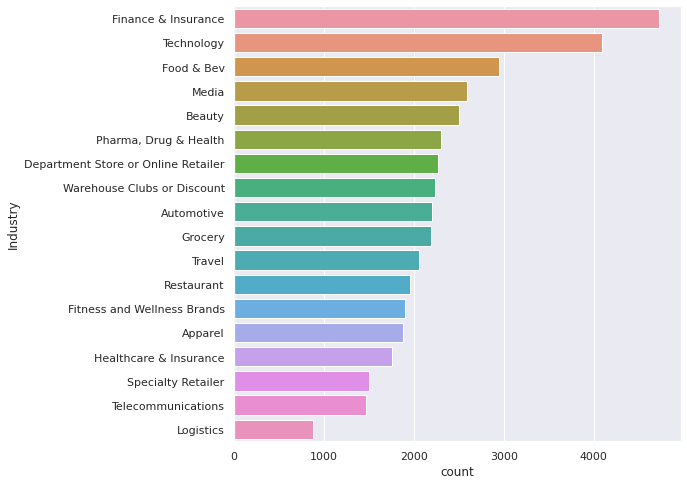

In [ ]:
sns.set(rc={"figure.figsize":(8, 8)})
sns.countplot(data = df, y='Industry', order = df['Industry'].value_counts().index)

In [ ]:
df_industry_stats = df.groupby(['Industry']).mean().copy()
df_industry_stats

Emotional Relationship 1  \
Industry                                                        
Apparel                                              6.133404   
Automotive                                           6.759074   
Beauty                                               6.569712   
Department Store or Online Retailer                  6.442189   
Finance & Insurance                                  6.308457   
Fitness and Wellness Brands                          6.529195   
Food & Bev                                           5.981997   
Grocery                                              6.788777   
Healthcare & Insurance                               6.378194   
Logistics                                            6.270148   
Media                                                6.204554   
Pharma, Drug & Health                                6.127170   
Restaurant                                           5.934661   
Specialty Retailer                                   6.616566   
Technology                                           6.325672   
Telecommunications                                   5.177155   
Travel                                               6.412336   
Warehouse Clubs or Discount                          6.175022   

                                     Emotional Relationship 2  \
Industry                                                        
Apparel                                              6.024546   
Automotive                                           6.584392   
Beauty                                               6.239583   
Department Store or Online Retailer                  6.390115   
Finance & Insurance                                  6.367230   
Fitness and Wellness Brands                          6.454498   
Food & Bev                                           5.836277   
Grocery                                              6.702099   
Healthcare & Insurance                               6.427598   
Logistics                                            6.224745   
Media                                                5.893477   
Pharma, Drug & Health                                6.138021   
Restaurant                                           5.724860   
Specialty Retailer                                   6.486974   
Technology                                           6.181418   
Telecommunications                                   5.086867   
Travel                                               6.257892   
Warehouse Clubs or Discount                          6.112355   

                                     Emotional Relationship 3  \
Industry                                                        
Apparel                                              5.429562   
Automotive                                           6.077132   
Beauty                                               5.849760   
Department Store or Online Retailer                  5.881289   
Finance & Insurance                                  5.772304   
Fitness and Wellness Brands                          6.147291   
Food & Bev                                           5.446332   
Grocery                                              6.346715   
Healthcare & Insurance                               6.031800   
Logistics                                            5.801362   
Media                                                5.541876   
Pharma, Drug & Health                                5.897135   
Restaurant                                           5.546708   
Specialty Retailer                                   6.112224   
Technology                                           5.849144   
Telecommunications                                   4.804378   
Travel                                               6.008742   
Warehouse Clubs or Discount                          5.782453   

                                     Emotional Relationship 4  \
Industry                                                        
Appa

In [ ]:
# Explore unique count of companies

len(df["Anonymous Company"].unique())

230

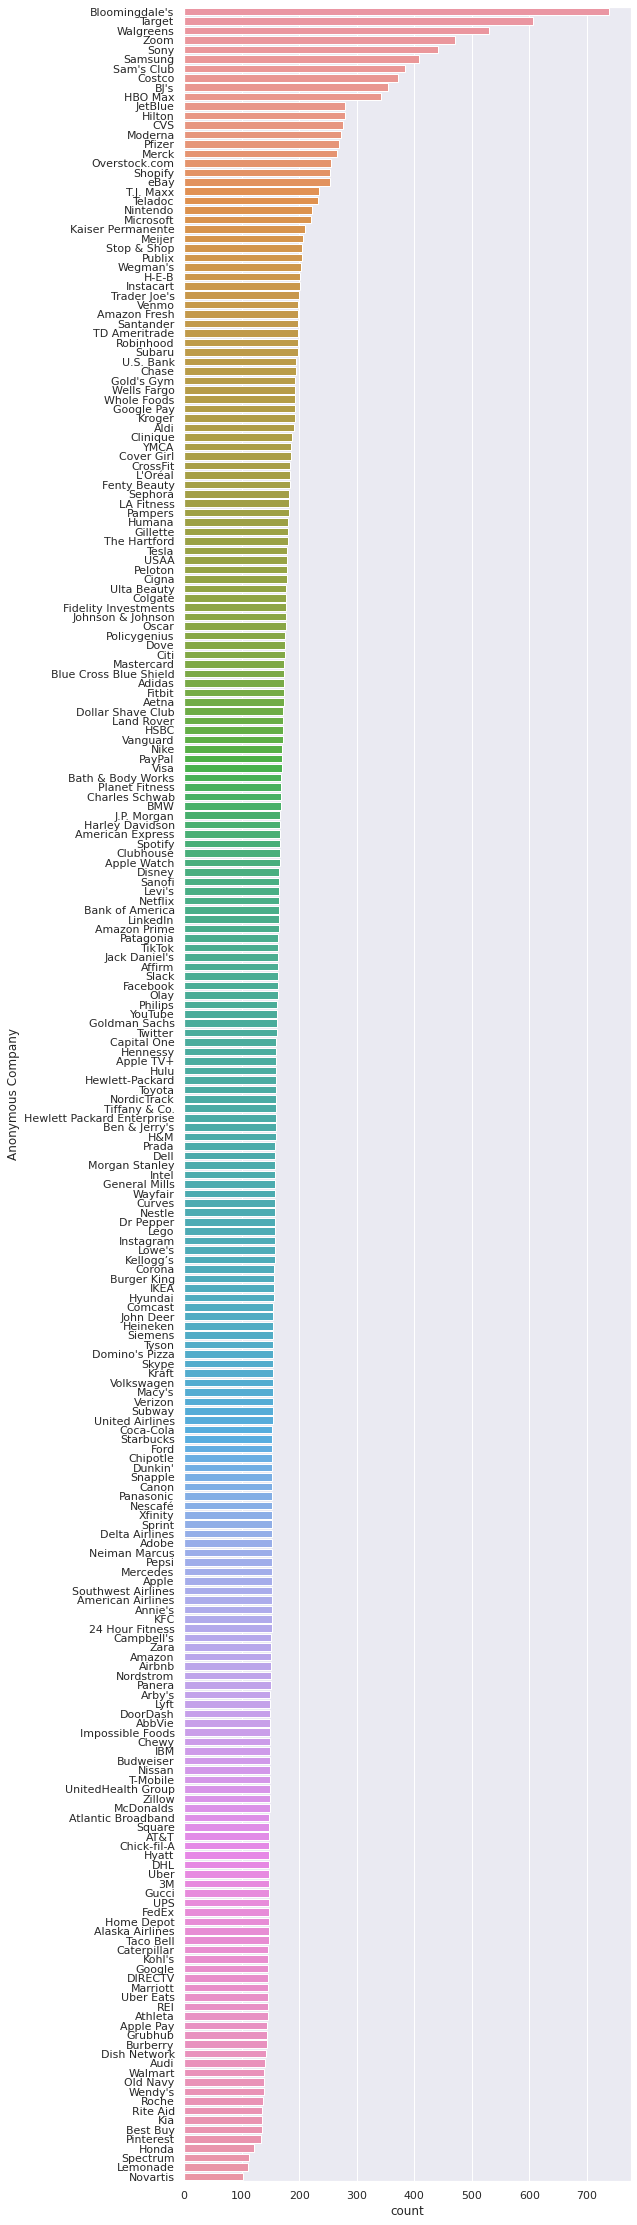

In [ ]:
sns.set(rc={"figure.figsize":(8, 40)})
sns.countplot(data = df, y='Anonymous Company', order = df['Anonymous Company'].value_counts().index)

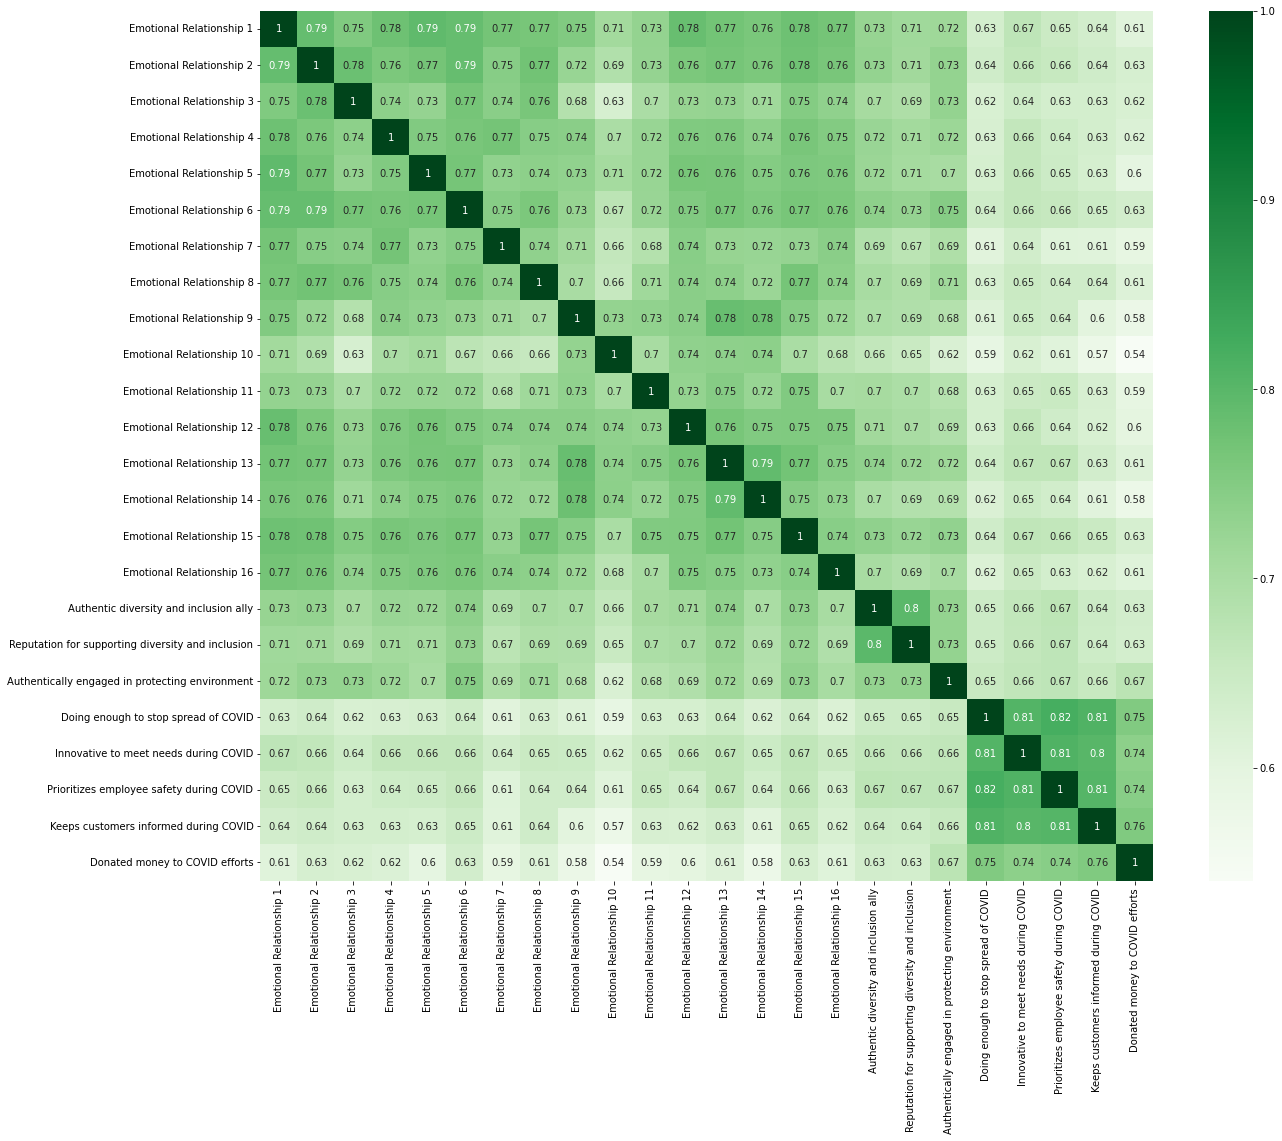

In [ ]:
df_corr = df.copy()
corr = df_corr.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

In [ ]:
# Observing the distribution of quantitative variables
#sns.pairplot(data=df.sample(100))


# Segmentation

In [ ]:
# Bar Chart to observe industry combinations

df_industry = df[["responseid", "Industry"]].copy()



In [ ]:
df.head()

responseid Anonymous Company                     Industry  \
1         44           Dunkin'                   Restaurant   
2         44            Google                   Technology   
3         46           Comcast           Telecommunications   
4         46        Sam's Club  Warehouse Clubs or Discount   
5         47              Zoom                   Technology   

  Likelihood to Recommend  Emotional Relationship 1  Emotional Relationship 2  \
1                      10                      10.0                      10.0   
2                       6                      10.0                      10.0   
3                       9                       8.0                       8.0   
4                       7                       5.0                       5.0   
5                       8                       7.0                       8.0   

   Emotional Relationship 3  Emotional Relationship 4  \
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       8.0                       8.0   
4                       5.0                       5.0   
5                       7.0                       6.0   

   Emotional Relationship 5  Emotional Relationship 6  ...  \
1                      10.0                       5.0  ...   
2                      10.0                       0.0  ...   
3                       9.0                       5.0  ...   
4                       5.0                       5.0  ...   
5                       6.0                       7.0  ...   

   Authentically engaged in protecting environment  \
1                                              0.0   
2                                              0.0   
3                                              5.0   
4                                              5.0   
5                                              7.0   

   Doing enough to stop spread of COVID  \
1                                  10.0   
2                                  10.0   
3                                   5.0   
4                                   5.0   
5                                   6.0   

   Innovative to meet needs during COVID  \
1                                    5.0   
2                                    0.0   
3                                    5.0   
4                                    5.0   
5                                    7.0   

   Prioritizes employee safety during COVID  \
1                                       5.0   
2                                       5.0   
3                                       5.0   
4                                       5.0   
5                                       7.0   

   Keeps customers informed during COVID  Donated money to COVID efforts  \
1                                    5.0                            10.0   
2                                    5.0                            10.0   
3                                    5.0                             5.0   
4                                    5.0                             5.0   
5                                    8.0                             8.0   

   Have recommended  Have discouraged  \
1                No                No   
2               Yes                No   
3               Yes                No   
4               Yes                No   
5                No                No   

                         Have recommended - open end  \
1                                                NaN   
2  I have a great Google printer. Easy to load pa...   
3                      They have taken care of me/us   
4                              Nothing in particular   
5                                                NaN   

   Have discouraged - open end  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN  
5                          NaN  

[5 rows x 32 columns]

# Clustering per Industry

The dataset can be segmented in multiple ways, first, all respondents can be directly clustered. Secondly, for each industry, respondents can be seperately segmented. This would help enlighten industry based insights.

In [ ]:
df["Industry"].unique()

array(['Restaurant', 'Technology', 'Telecommunications',
       'Warehouse Clubs or Discount', 'Grocery', 'Logistics',
       'Healthcare & Insurance', 'Finance & Insurance', 'Apparel',
       'Automotive', 'Department Store or Online Retailer',
       'Pharma, Drug & Health', 'Media', 'Specialty Retailer', 'Travel',
       'Beauty', 'Food & Bev', 'Fitness and Wellness Brands'],
      dtype=object)

In [ ]:
# Sort by industry name to get the accurate visualization

df_sorted = df.sort_values(["responseid", "Industry"]).copy()
df_sorted.head()

responseid Anonymous Company                     Industry  \
1         44           Dunkin'                   Restaurant   
2         44            Google                   Technology   
3         46           Comcast           Telecommunications   
4         46        Sam's Club  Warehouse Clubs or Discount   
6         47      Trader Joe's                      Grocery   

  Likelihood to Recommend  Emotional Relationship 1  Emotional Relationship 2  \
1                      10                      10.0                      10.0   
2                       6                      10.0                      10.0   
3                       9                       8.0                       8.0   
4                       7                       5.0                       5.0   
6                       7                       7.0                       8.0   

   Emotional Relationship 3  Emotional Relationship 4  \
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       8.0                       8.0   
4                       5.0                       5.0   
6                       7.0                       8.0   

   Emotional Relationship 5  Emotional Relationship 6  ...  \
1                      10.0                       5.0  ...   
2                      10.0                       0.0  ...   
3                       9.0                       5.0  ...   
4                       5.0                       5.0  ...   
6                       8.0                       7.0  ...   

   Authentically engaged in protecting environment  \
1                                              0.0   
2                                              0.0   
3                                              5.0   
4                                              5.0   
6                                              8.0   

   Doing enough to stop spread of COVID  \
1                                  10.0   
2                                  10.0   
3                                   5.0   
4                                   5.0   
6                                   7.0   

   Innovative to meet needs during COVID  \
1                                    5.0   
2                                    0.0   
3                                    5.0   
4                                    5.0   
6                                    6.0   

   Prioritizes employee safety during COVID  \
1                                       5.0   
2                                       5.0   
3                                       5.0   
4                                       5.0   
6                                       8.0   

   Keeps customers informed during COVID  Donated money to COVID efforts  \
1                                    5.0                            10.0   
2                                    5.0                            10.0   
3                                    5.0                             5.0   
4                                    5.0                             5.0   
6                                    8.0                             6.0   

   Have recommended  Have discouraged  \
1                No                No   
2               Yes                No   
3               Yes                No   
4               Yes                No   
6                No                No   

                         Have recommended - open end  \
1                                                NaN   
2  I have a great Google printer. Easy to load pa...   
3                      They have taken care of me/us   
4                              Nothing in particular   
6                                                NaN   

   Have discouraged - open end  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN  
6                          NaN  

[5 rows x 32 columns]

In [ ]:
df_Industry = df_sorted[["responseid", "Industry"]].copy()
df_Industry_Combined = (
df_Industry
    .groupby(["responseid"])["Industry"]
    .apply(lambda x: pd.DataFrame(itertools.combinations(list(x),2)))
    .reset_index()
    .merge(df_Industry, left_on=["responseid",0], right_on=["responseid","Industry"])
    .merge(df_Industry, left_on=["responseid",1], right_on=["responseid","Industry"], suffixes=("0","1"))
    .drop(columns=["level_1",0,1])
)
df_Industry_Combined.head()

responseid               Industry0                    Industry1
0         44              Restaurant                   Technology
1         46      Telecommunications  Warehouse Clubs or Discount
2         47                 Grocery                   Technology
3         49              Technology           Telecommunications
4         53  Healthcare & Insurance                    Logistics

In [ ]:
df_Industry_Combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21631 entries, 0 to 21630
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   responseid  21631 non-null  object
 1   Industry0   21631 non-null  object
 2   Industry1   21631 non-null  object
dtypes: object(3)
memory usage: 676.0+ KB


In [ ]:
df_Industry_Combined["Combined_Industries"] = (df_Industry_Combined["Industry0"]).astype(str) + "_" + (df_Industry_Combined["Industry1"]).astype(str)
df_Industry_Combined.head()

responseid               Industry0                    Industry1  \
0         44              Restaurant                   Technology   
1         46      Telecommunications  Warehouse Clubs or Discount   
2         47                 Grocery                   Technology   
3         49              Technology           Telecommunications   
4         53  Healthcare & Insurance                    Logistics   

                              Combined_Industries  
0                           Restaurant_Technology  
1  Telecommunications_Warehouse Clubs or Discount  
2                              Grocery_Technology  
3                   Technology_Telecommunications  
4                Healthcare & Insurance_Logistics

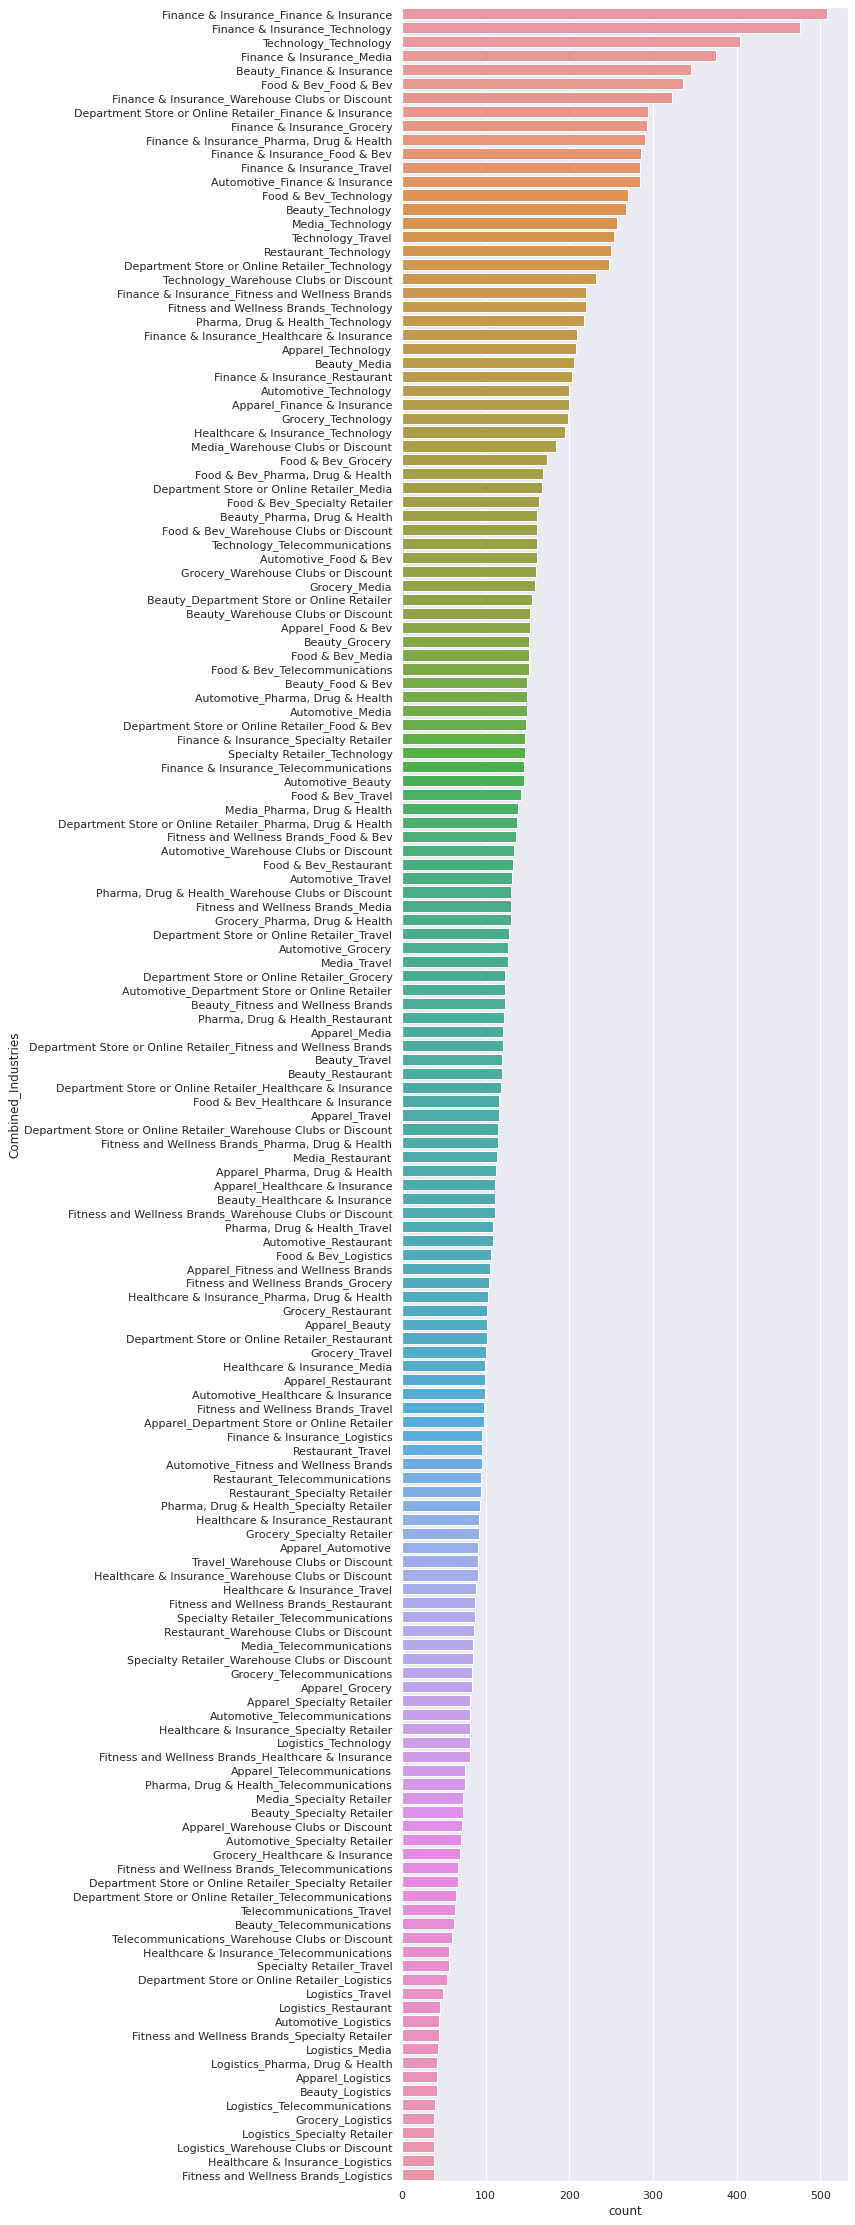

In [ ]:
sns.set(rc={"figure.figsize":(8, 40)})
sns.countplot(data = df_Industry_Combined, y='Combined_Industries', order = df_Industry_Combined['Combined_Industries'].value_counts().index)

In [ ]:
df.columns

Index(['responseid', 'Anonymous Company', 'Industry',
       'Likelihood to Recommend', 'Emotional Relationship 1',
       'Emotional Relationship 2', 'Emotional Relationship 3',
       'Emotional Relationship 4', 'Emotional Relationship 5',
       'Emotional Relationship 6', 'Emotional Relationship 7',
       'Emotional Relationship 8', 'Emotional Relationship 9',
       'Emotional Relationship 10', 'Emotional Relationship 11',
       'Emotional Relationship 12', 'Emotional Relationship 13',
       'Emotional Relationship 14', 'Emotional Relationship 15',
       'Emotional Relationship 16', 'Authentic diversity and inclusion ally',
       'Reputation for supporting diversity and inclusion',
       'Authentically engaged in protecting environment',
       'Doing enough to stop spread of COVID',
       'Innovative to meet needs during COVID',
       'Prioritizes employee safety during COVID',
       'Keeps customers informed during COVID',
       'Donated money to COVID efforts', 'Have 

Clustering for Technology, Finance, Media, Beauty and Food & Bev Responders.

In [ ]:
df_selected_industries = df.loc[(df['Industry'] == 'Technology') | (df['Industry'] == 'Finance & Insurance') | 
        (df['Industry'] == 'Media') | (df['Industry'] == 'Beauty') | (df['Industry'] == 'Food & Bev')].copy()


In [ ]:
len(df_selected_industries)

16851

In [ ]:
df_selected_industries.duplicated(subset=["responseid"]).sum()
#Since some records are doubled, we need to downsample them. To do that, relying on the assumption of similar industries, taking average of duplicated ids.


3098

In [ ]:
df_clustering = df_selected_industries[['responseid',
       'Likelihood to Recommend', 'Emotional Relationship 1',
       'Emotional Relationship 2', 'Emotional Relationship 3',
       'Emotional Relationship 4', 'Emotional Relationship 5',
       'Emotional Relationship 6', 'Emotional Relationship 7',
       'Emotional Relationship 8', 'Emotional Relationship 9',
       'Emotional Relationship 10', 'Emotional Relationship 11',
       'Emotional Relationship 12', 'Emotional Relationship 13',
       'Emotional Relationship 14', 'Emotional Relationship 15',
       'Emotional Relationship 16', 'Authentic diversity and inclusion ally',
       'Reputation for supporting diversity and inclusion',
       'Authentically engaged in protecting environment']].copy()

In [ ]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16851 entries, 2 to 41445
Data columns (total 21 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   responseid                                         16851 non-null  object 
 1   Likelihood to Recommend                            16851 non-null  object 
 2   Emotional Relationship 1                           16851 non-null  float64
 3   Emotional Relationship 2                           16851 non-null  float64
 4   Emotional Relationship 3                           16851 non-null  float64
 5   Emotional Relationship 4                           16851 non-null  float64
 6   Emotional Relationship 5                           16851 non-null  float64
 7   Emotional Relationship 6                           16851 non-null  float64
 8   Emotional Relationship 7                           16851 non-null  float64
 9   Emotio

In [ ]:
df_clustering_dedup = df_clustering.groupby('responseid').mean().reset_index()
df_clustering_dedup.head()

responseid  Likelihood to Recommend  Emotional Relationship 1  \
0          44                      6.0                      10.0   
1          47                      8.0                       7.0   
2          49                      5.0                       1.0   
3          54                      5.0                       8.0   
4          55                      6.5                       5.0   

   Emotional Relationship 2  Emotional Relationship 3  \
0                      10.0                       0.0   
1                       8.0                       7.0   
2                       2.0                       2.0   
3                       5.0                       6.0   
4                       6.0                       5.0   

   Emotional Relationship 4  Emotional Relationship 5  \
0                       0.0                      10.0   
1                       6.0                       6.0   
2                       5.0                       3.0   
3                       6.0                       3.0   
4                       5.0                       5.0   

   Emotional Relationship 6  Emotional Relationship 7  \
0                       0.0                      10.0   
1                       7.0                       8.0   
2                       2.0                       1.0   
3                       4.0                       7.0   
4                       5.0                       5.0   

   Emotional Relationship 8  ...  Emotional Relationship 10  \
0                       0.0  ...                        0.0   
1                       8.0  ...                        6.0   
2                       2.0  ...                        5.0   
3                       6.0  ...                        6.0   
4                       5.0  ...                        7.0   

   Emotional Relationship 11  Emotional Relationship 12  \
0                       10.0                       10.0   
1                        8.0                        8.0   
2                        4.0                        5.0   
3                        7.0                        6.0   
4                        5.0                        6.0   

   Emotional Relationship 13  Emotional Relationship 14  \
0                       10.0                        0.0   
1                        8.0                        8.0   
2                        4.0                        4.0   
3                        8.0                        7.0   
4                        6.0                        7.0   

   Emotional Relationship 15  Emotional Relationship 16  \
0                        0.0                       10.0   
1                        6.0                        9.0   
2                        1.0                        3.0   
3                        6.0                        7.0   
4                        5.5                        6.0   

   Authentic diversity and inclusion ally  \
0                                     5.0   
1                                     6.0   
2                                     2.0   
3                                     5.0   
4                                     5.0   

   Reputation for supporting diversity and inclusion  \
0                                                5.0   
1                                                7.0   
2                                                2.0   
3                                                5.0   
4                                                6.0   

   Authentically engaged in protecting environment  
0                                              0.0  
1                                              7.0  
2                                              1.0  
3                                              7.0  
4                                              5.0  

[5 rows x 21 columns]

In [ ]:
df_clustering_dedup.info()
16851-3098

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13753 entries, 0 to 13752
Data columns (total 20 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   responseid                                         13753 non-null  int64  
 1   Emotional Relationship 1                           13753 non-null  float64
 2   Emotional Relationship 2                           13753 non-null  float64
 3   Emotional Relationship 3                           13753 non-null  float64
 4   Emotional Relationship 4                           13753 non-null  float64
 5   Emotional Relationship 5                           13753 non-null  float64
 6   Emotional Relationship 6                           13753 non-null  float64
 7   Emotional Relationship 7                           13753 non-null  float64
 8   Emotional Relationship 8                           13753 non-null  float64
 9   Emotio

13753

In [ ]:
df_clustering_dedup.columns

Index(['responseid', 'Likelihood to Recommend', 'Emotional Relationship 1',
       'Emotional Relationship 2', 'Emotional Relationship 3',
       'Emotional Relationship 4', 'Emotional Relationship 5',
       'Emotional Relationship 6', 'Emotional Relationship 7',
       'Emotional Relationship 8', 'Emotional Relationship 9',
       'Emotional Relationship 10', 'Emotional Relationship 11',
       'Emotional Relationship 12', 'Emotional Relationship 13',
       'Emotional Relationship 14', 'Emotional Relationship 15',
       'Emotional Relationship 16', 'Authentic diversity and inclusion ally',
       'Reputation for supporting diversity and inclusion',
       'Authentically engaged in protecting environment'],
      dtype='object')

In [ ]:
from sklearn import metrics

X = df_clustering_dedup[['Likelihood to Recommend', 'Emotional Relationship 1', 'Emotional Relationship 2',
       'Emotional Relationship 3', 'Emotional Relationship 4',
       'Emotional Relationship 5', 'Emotional Relationship 6',
       'Emotional Relationship 7', 'Emotional Relationship 8',
       'Emotional Relationship 9', 'Emotional Relationship 10',
       'Emotional Relationship 11', 'Emotional Relationship 12',
       'Emotional Relationship 13', 'Emotional Relationship 14',
       'Emotional Relationship 15', 'Emotional Relationship 16',
       'Authentic diversity and inclusion ally',
       'Reputation for supporting diversity and inclusion',
       'Authentically engaged in protecting environment']].iloc[: , :].values
inertia = []
silhouette_scores = []
for n in range(2 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state=6, algorithm='elkan'))
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)
    label = algorithm.labels_
    silhouette_scores.append(metrics.silhouette_score(X, label))


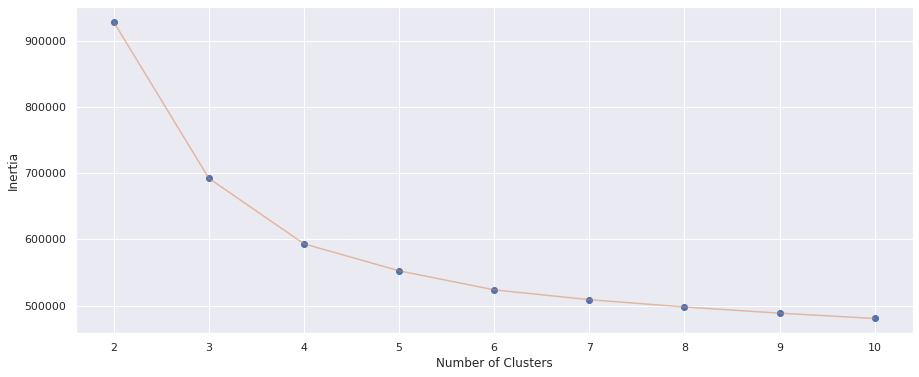

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , inertia , 'o')
plt.plot(np.arange(2 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

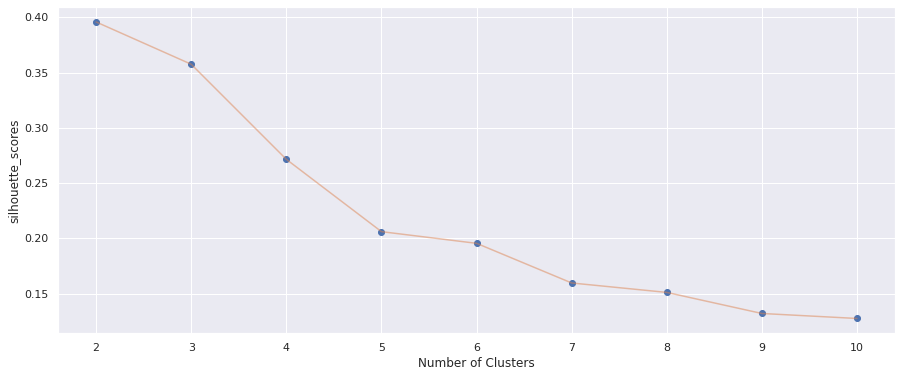

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , silhouette_scores , 'o')
plt.plot(np.arange(2 , 11) , silhouette_scores , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('silhouette_scores')
plt.show()

In [ ]:
# 5 Clusters seem to be the ideal case.

model_finance = (KMeans(n_clusters = 5, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state=6, algorithm='elkan'))

model_finance.fit(X)
label = model_finance.labels_


In [ ]:
df_clustering_dedup["Cluster_Label"] = label

In [ ]:
df_clustering_dedup.columns

Index(['responseid', 'Likelihood to Recommend', 'Emotional Relationship 1',
       'Emotional Relationship 2', 'Emotional Relationship 3',
       'Emotional Relationship 4', 'Emotional Relationship 5',
       'Emotional Relationship 6', 'Emotional Relationship 7',
       'Emotional Relationship 8', 'Emotional Relationship 9',
       'Emotional Relationship 10', 'Emotional Relationship 11',
       'Emotional Relationship 12', 'Emotional Relationship 13',
       'Emotional Relationship 14', 'Emotional Relationship 15',
       'Emotional Relationship 16', 'Authentic diversity and inclusion ally',
       'Reputation for supporting diversity and inclusion',
       'Authentically engaged in protecting environment', 'Cluster_Label'],
      dtype='object')

Text(0, 0.5, 'Emotional Relationship 2')

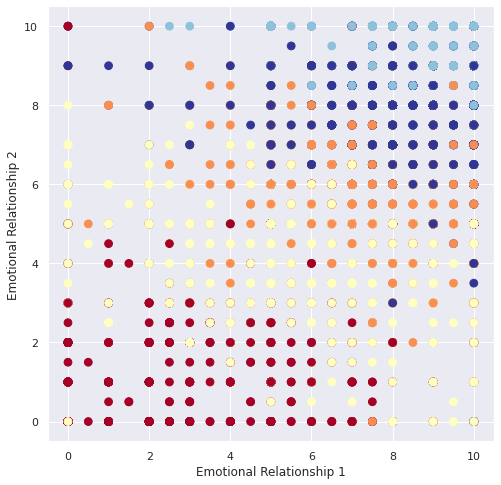

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(df_clustering_dedup["Likelihood to Recommend"], df_clustering_dedup["Emotional Relationship 2"], 
            s = 60, c = df_clustering_dedup["Cluster_Label"], cmap = "RdYlBu")
plt.xlabel("Emotional Relationship 1")
plt.ylabel("Emotional Relationship 2")

In [ ]:
df_clustering_dedup_stats = df_clustering_dedup.groupby(['Cluster_Label']).mean().copy()
df_clustering_dedup_stats

responseid  Likelihood to Recommend  \
Cluster_Label                                          
0              21134.422142                 3.401440   
1              20296.383820                 7.467080   
2              20402.521958                 5.771189   
3              23403.561996                 9.451248   
4              20650.071870                 8.431382   

               Emotional Relationship 1  Emotional Relationship 2  \
Cluster_Label                                                       
0                              1.397840                  1.376238   
1                              6.067021                  5.762031   
2                              4.474825                  4.419441   
3                              9.426296                  9.405566   
4                              7.770081                  7.562439   

               Emotional Relationship 3  Emotional Relationship 4  \
Cluster_Label                                                       
0                              1.059856                  1.666517   
1                              5.208149                  5.901683   
2                              3.947832                  4.614266   
3                              9.178119                  9.307102   
4                              7.120650                  7.595772   

               Emotional Relationship 5  Emotional Relationship 6  \
Cluster_Label                                                       
0                              1.717822                  1.332583   
1                              6.200325                  5.716416   
2                              4.645315                  4.348252   
3                              9.461804                  9.310749   
4                              7.817886                  7.464390   

               Emotional Relationship 7  Emotional Relationship 8  ...  \
Cluster_Label                                                      ...   
0                              1.249325                  1.202520  ...   
1                              5.778713                  5.506053  ...   
2                              4.218042                  4.112587  ...   
3                              9.295585                  9.318810  ...   
4                              7.488780                  7.423577  ...   

               Emotional Relationship 10  Emotional Relationship 11  \
Cluster_Label                                                         
0                               2.953645                   2.087759   
1                               7.002362                   6.167700   
2                               5.464336                   4.806154   
3                               9.543186                   9.446065   
4                               8.229756                   7.756098   

               Emotional Relationship 12  Emotional Relationship 13  \
Cluster_Label                                                         
0                               1.751575                   2.031953   
1                               6.244464                   6.380425   
2                               4.730210                   4.872028   
3                               9.466795                   9.515163   
4                               7.891870                   7.991545   

               Emotional Relationship 14  Emotional Relationship 15  \
Cluster_Label                                                         
0                               1.716472                   1.703420   
1                               6.825509                   5.901240   
2                               4.917762                   4.550350   
3                               9.555086                   9.401919   
4                               8.161463                   7.635447   

               Emotional Relationship 16  \
Cluster_Label                              
0                               1.581908   
1                          

## Clustering for the Entire Dataset

In [ ]:
df_full_clustering = df[['responseid',
       'Likelihood to Recommend', 'Emotional Relationship 1',
       'Emotional Relationship 2', 'Emotional Relationship 3',
       'Emotional Relationship 4', 'Emotional Relationship 5',
       'Emotional Relationship 6', 'Emotional Relationship 7',
       'Emotional Relationship 8', 'Emotional Relationship 9',
       'Emotional Relationship 10', 'Emotional Relationship 11',
       'Emotional Relationship 12', 'Emotional Relationship 13',
       'Emotional Relationship 14', 'Emotional Relationship 15',
       'Emotional Relationship 16', 'Authentic diversity and inclusion ally',
       'Reputation for supporting diversity and inclusion',
       'Authentically engaged in protecting environment']].copy()

In [ ]:
df_full_clustering_dedup = df_full_clustering.groupby('responseid').mean().reset_index()
df_full_clustering_dedup.head()

responseid  Likelihood to Recommend  Emotional Relationship 1  \
0          44                      8.0                      10.0   
1          46                      8.0                       6.5   
2          47                      7.5                       7.0   
3          49                      2.5                       0.5   
4          53                      6.5                       6.0   

   Emotional Relationship 2  Emotional Relationship 3  \
0                      10.0                       0.0   
1                       6.5                       6.5   
2                       8.0                       7.0   
3                       1.0                       1.0   
4                       5.0                       5.0   

   Emotional Relationship 4  Emotional Relationship 5  \
0                       0.0                      10.0   
1                       6.5                       7.0   
2                       7.0                       7.0   
3                       2.5                       1.5   
4                       4.5                       7.0   

   Emotional Relationship 6  Emotional Relationship 7  \
0                       2.5                       6.5   
1                       5.0                       6.0   
2                       7.0                       7.0   
3                       1.0                       0.5   
4                       5.0                       5.0   

   Emotional Relationship 8  ...  Emotional Relationship 10  \
0                       0.0  ...                        4.0   
1                       5.0  ...                        6.5   
2                       7.5  ...                        7.0   
3                       1.0  ...                        2.5   
4                       3.5  ...                        7.5   

   Emotional Relationship 11  Emotional Relationship 12  \
0                       10.0                        7.5   
1                        6.5                        6.5   
2                        7.0                        8.0   
3                        2.0                        2.5   
4                        7.5                        6.5   

   Emotional Relationship 13  Emotional Relationship 14  \
0                       10.0                        4.0   
1                        6.5                        6.5   
2                        8.0                        7.0   
3                        3.0                        2.0   
4                        6.0                        6.5   

   Emotional Relationship 15  Emotional Relationship 16  \
0                        2.5                        5.0   
1                        6.5                        6.5   
2                        6.5                        8.5   
3                        0.5                        2.5   
4                        6.0                        5.0   

   Authentic diversity and inclusion ally  \
0                                     7.5   
1                                     5.0   
2                                     6.5   
3                                     2.0   
4                                     6.5   

   Reputation for supporting diversity and inclusion  \
0                                                7.5   
1                                                5.0   
2                                                7.0   
3                                                2.0   
4                                                6.5   

   Authentically engaged in protecting environment  
0                                              0.0  
1                                              5.0  
2                                              7.5  
3                                              1.5  
4                                              5.5  

[5 rows x 21 columns]

In [ ]:
X = df_full_clustering_dedup[['Likelihood to Recommend', 'Emotional Relationship 1', 'Emotional Relationship 2',
       'Emotional Relationship 3', 'Emotional Relationship 4',
       'Emotional Relationship 5', 'Emotional Relationship 6',
       'Emotional Relationship 7', 'Emotional Relationship 8',
       'Emotional Relationship 9', 'Emotional Relationship 10',
       'Emotional Relationship 11', 'Emotional Relationship 12',
       'Emotional Relationship 13', 'Emotional Relationship 14',
       'Emotional Relationship 15', 'Emotional Relationship 16',
       'Authentic diversity and inclusion ally',
       'Reputation for supporting diversity and inclusion',
       'Authentically engaged in protecting environment']].iloc[: , :].values
inertia = []
silhouette_scores = []
for n in range(2 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state=6, algorithm='elkan'))
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)
    label = algorithm.labels_
    silhouette_scores.append(metrics.silhouette_score(X, label))

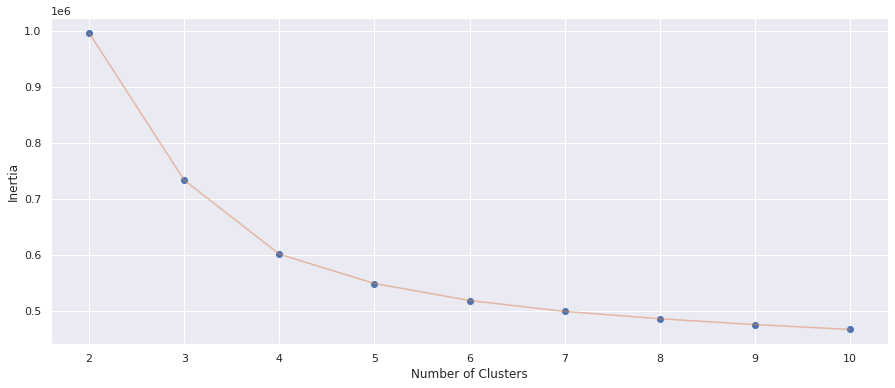

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , inertia , 'o')
plt.plot(np.arange(2 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

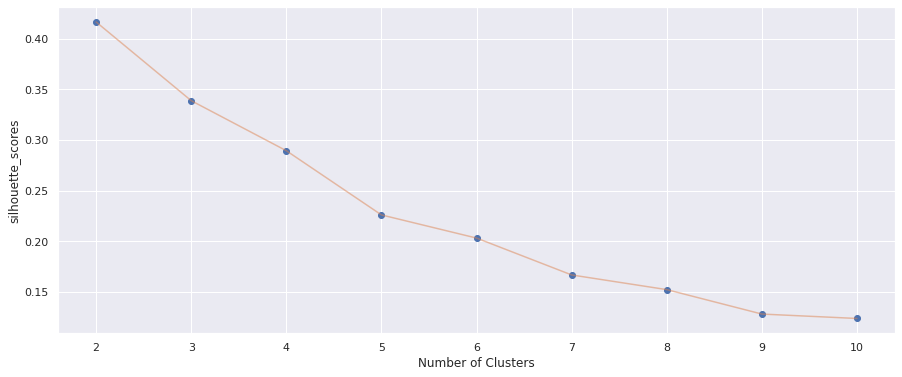

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , silhouette_scores , 'o')
plt.plot(np.arange(2 , 11) , silhouette_scores , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('silhouette_scores')
plt.show()

In [ ]:
# 5 Clusters seem to be the ideal case.

model = (KMeans(n_clusters = 5, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state=6, algorithm='elkan'))

model.fit(X)
label = model.labels_


In [ ]:
df_full_clustering_dedup["Cluster_Label"] = label

In [ ]:
df_full_clustering_dedup_stats = df_full_clustering_dedup.groupby(['Cluster_Label']).mean().copy()
df_full_clustering_dedup_stats

responseid  Likelihood to Recommend  \
Cluster_Label                                          
0              19576.136707                 7.246655   
1              20354.718003                 8.223821   
2              19930.358245                 5.966258   
3              19996.489874                 4.292282   
4              23063.436885                 9.294126   

               Emotional Relationship 1  Emotional Relationship 2  \
Cluster_Label                                                       
0                              6.100155                  5.901396   
1                              7.630315                  7.504019   
2                              4.658487                  4.549916   
3                              2.221401                  2.214559   
4                              9.300683                  9.284973   

               Emotional Relationship 3  Emotional Relationship 4  \
Cluster_Label                                                       
0                              5.406923                  5.984099   
1                              7.149884                  7.430611   
2                              4.128091                  4.691021   
3                              1.783525                  2.447729   
4                              9.072404                  9.155874   

               Emotional Relationship 5  Emotional Relationship 6  \
Cluster_Label                                                       
0                              6.241516                  5.841090   
1                              7.717897                  7.383118   
2                              4.821528                  4.513664   
3                              2.480022                  2.157362   
4                              9.334563                  9.218989   

               Emotional Relationship 7  Emotional Relationship 8  ...  \
Cluster_Label                                                      ...   
0                              5.784274                  5.787182  ...   
1                              7.345568                  7.392638  ...   
2                              4.343744                  4.370143  ...   
3                              2.120963                  1.998905  ...   
4                              9.132377                  9.230328  ...   

               Emotional Relationship 10  Emotional Relationship 11  \
Cluster_Label                                                         
0                               7.002909                   6.409250   
1                               8.112545                   7.802729   
2                               5.604387                   5.047964   
3                               3.729611                   2.917351   
4                               9.455328                   9.338525   

               Emotional Relationship 12  Emotional Relationship 13  \
Cluster_Label                                                         
0                               6.310743                   6.434652   
1                               7.760207                   7.849799   
2                               4.930191                   5.017475   
3                               2.665846                   2.745211   
4                               9.358333                   9.398770   

               Emotional Relationship 14  Emotional Relationship 15  \
Cluster_Label                                                         
0                               6.743165                   6.043145   
1                               8.007827                   7.570446   
2                               5.103551                   4.704964   
3                               2.664477                   2.412425   
4                               9.435792                   9.275410   

               Emotional Relationship 16  \
Cluster_Label                              
0                               6.046830   
1                          

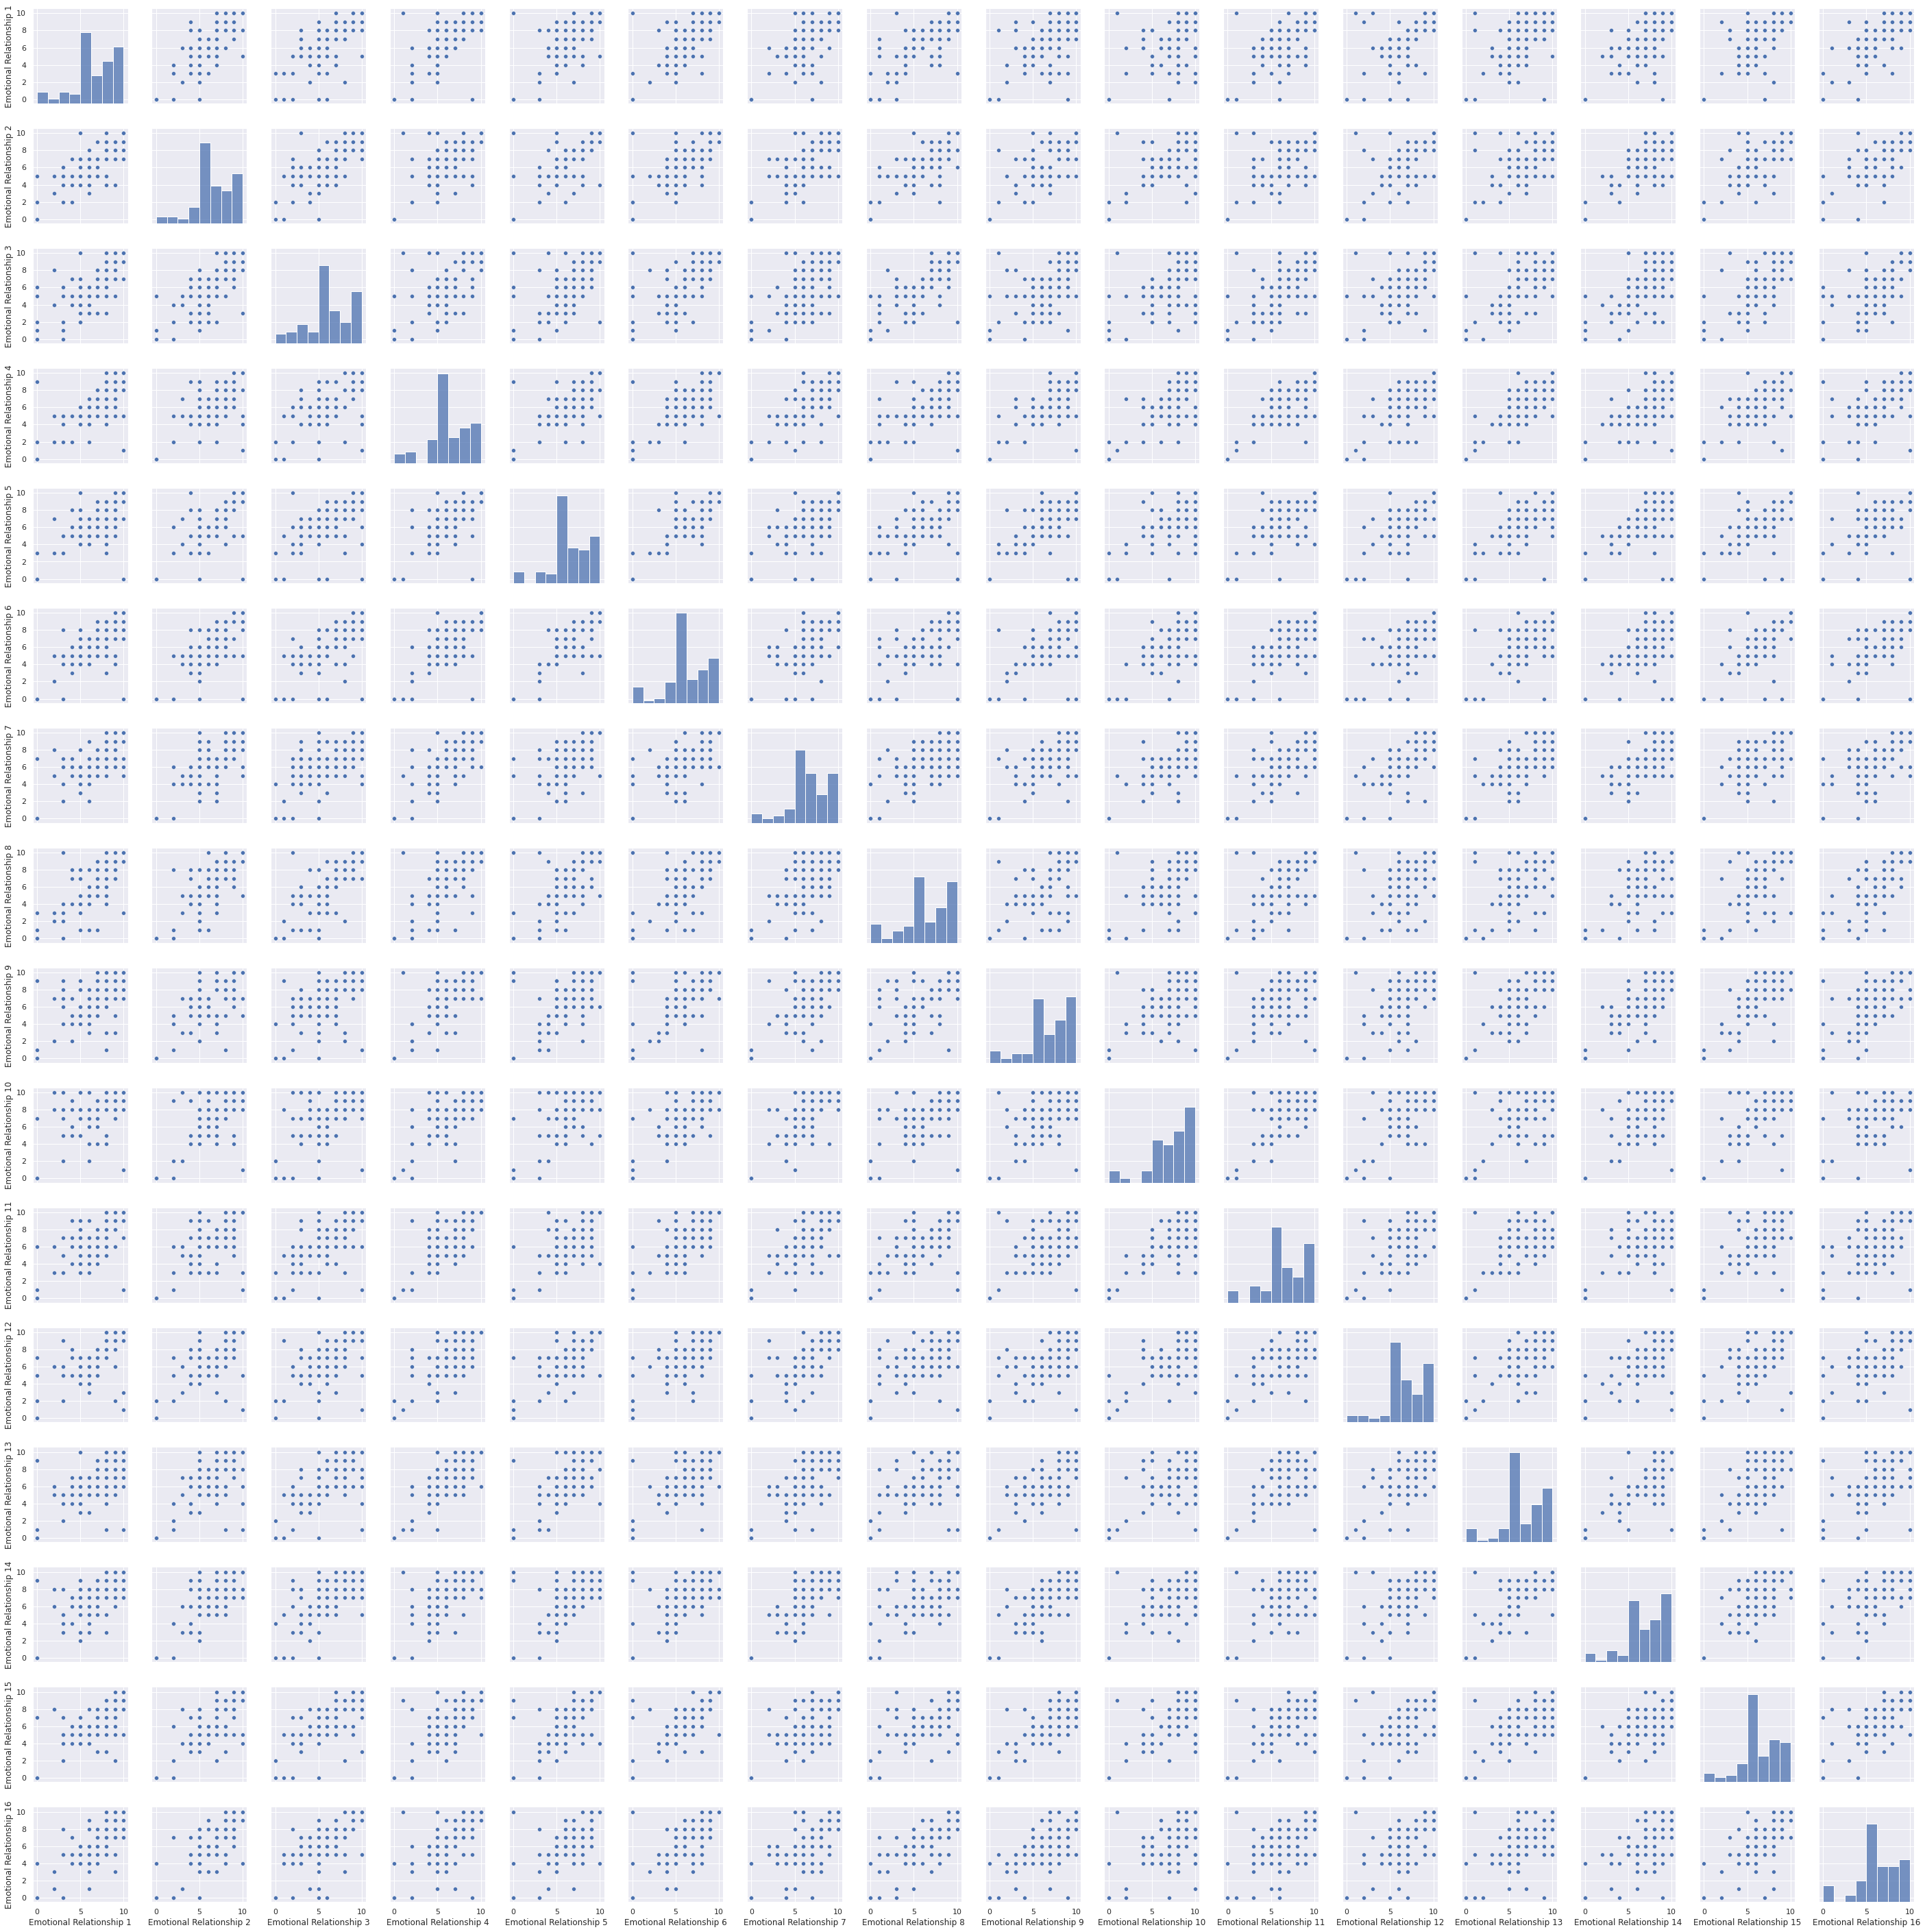

In [ ]:
sns.set(font_scale=1)
columns = ['Emotional Relationship 1', 'Emotional Relationship 2', 'Emotional Relationship 3',
       'Emotional Relationship 4', 'Emotional Relationship 5', 'Emotional Relationship 6', 'Emotional Relationship 7',
       'Emotional Relationship 8', 'Emotional Relationship 9',
       'Emotional Relationship 10', 'Emotional Relationship 11',
       'Emotional Relationship 12', 'Emotional Relationship 13',
       'Emotional Relationship 14', 'Emotional Relationship 15',
       'Emotional Relationship 16']
sns.pairplot(df.sample(100)[columns])

### Since each individual selects the company they share ther opinion about, likelihood to recommend gives an essential idea about each customer. For example, if a customer is selecting a company to give a lower score, that type of customer prioritizes complaining, not praising, and vice versa.

#### Having 2 company reviews per person is a caveat. To overcome this, the highest score per id and lowest score per id can be segmented seperately. This approach would also take into account the perspective of choosing two companies, praising one and criticising other.

In [ ]:
df_max_pms = df.loc[df["Likelihood to Recommend"].eq(df.groupby('responseid')["Likelihood to Recommend"].transform('max'))]
df_min_pms = df.loc[df["Likelihood to Recommend"].eq(df.groupby('responseid')["Likelihood to Recommend"].transform('min'))]


In [ ]:
df_min_pms.describe()

Emotional Relationship 1  Emotional Relationship 2  \
count              26960.000000              26960.000000   
mean                   6.062315                  6.008123   
std                    2.845864                  2.818990   
min                    0.000000                  0.000000   
25%                    5.000000                  5.000000   
50%                    6.000000                  6.000000   
75%                    8.000000                  8.000000   
max                   10.000000                 10.000000   

       Emotional Relationship 3  Emotional Relationship 4  \
count              26960.000000              26960.000000   
mean                   5.683791                  5.999740   
std                    2.928943                  2.765251   
min                    0.000000                  0.000000   
25%                    4.000000                  5.000000   
50%                    5.000000                  6.000000   
75%                    8.000000                  8.000000   
max                   10.000000                 10.000000   

       Emotional Relationship 5  Emotional Relationship 6  \
count              26960.000000              26960.000000   
mean                   6.189503                  5.933197   
std                    2.805521                  2.816117   
min                    0.000000                  0.000000   
25%                    5.000000                  5.000000   
50%                    6.000000                  6.000000   
75%                    9.000000                  8.000000   
max                   10.000000                 10.000000   

       Emotional Relationship 7  Emotional Relationship 8  \
count              26960.000000              26960.000000   
mean                   5.772960                  5.887463   
std                    2.966567                  2.924654   
min                    0.000000                  0.000000   
25%                    4.000000                  4.000000   
50%                    6.000000                  6.000000   
75%                    8.000000                  8.000000   
max                   10.000000                 10.000000   

       Emotional Relationship 9  Emotional Relationship 10  ...  \
count              26960.000000               26960.000000  ...   
mean                   6.548442                   6.753004  ...   
std                    2.741376                   2.682752  ...   
min                    0.000000                   0.000000  ...   
25%                    5.000000                   5.000000  ...   
50%                    7.000000                   7.000000  ...   
75%                    9.000000                   9.000000  ...   
max                   10.000000                  10.000000  ...   

       Emotional Relationship 15  Emotional Relationship 16  \
count               26960.000000               26960.000000   
mean                    6.108234                   6.062203   
std                     2.777105                   2.840275   
min                     0.000000                   0.000000   
25%                     5.000000                   5.000000   
50%                     6.000000                   6.000000   
75%                     8.000000                   8.000000   
max                    10.000000                  10.000000   

       Authentic diversity and inclusion ally  \
count                            26960.000000   
mean                                 6.245475   
std                                  2.636232   
min                                  0.000000   
25%                                  5.000000   
50%                                  6.000000   
75%                                  8.000000   
max                                 10.000000   

       Reputation for supporting diversity and inclusion  \
count                                       26960.000000   
mean                                            6.255267   
std          

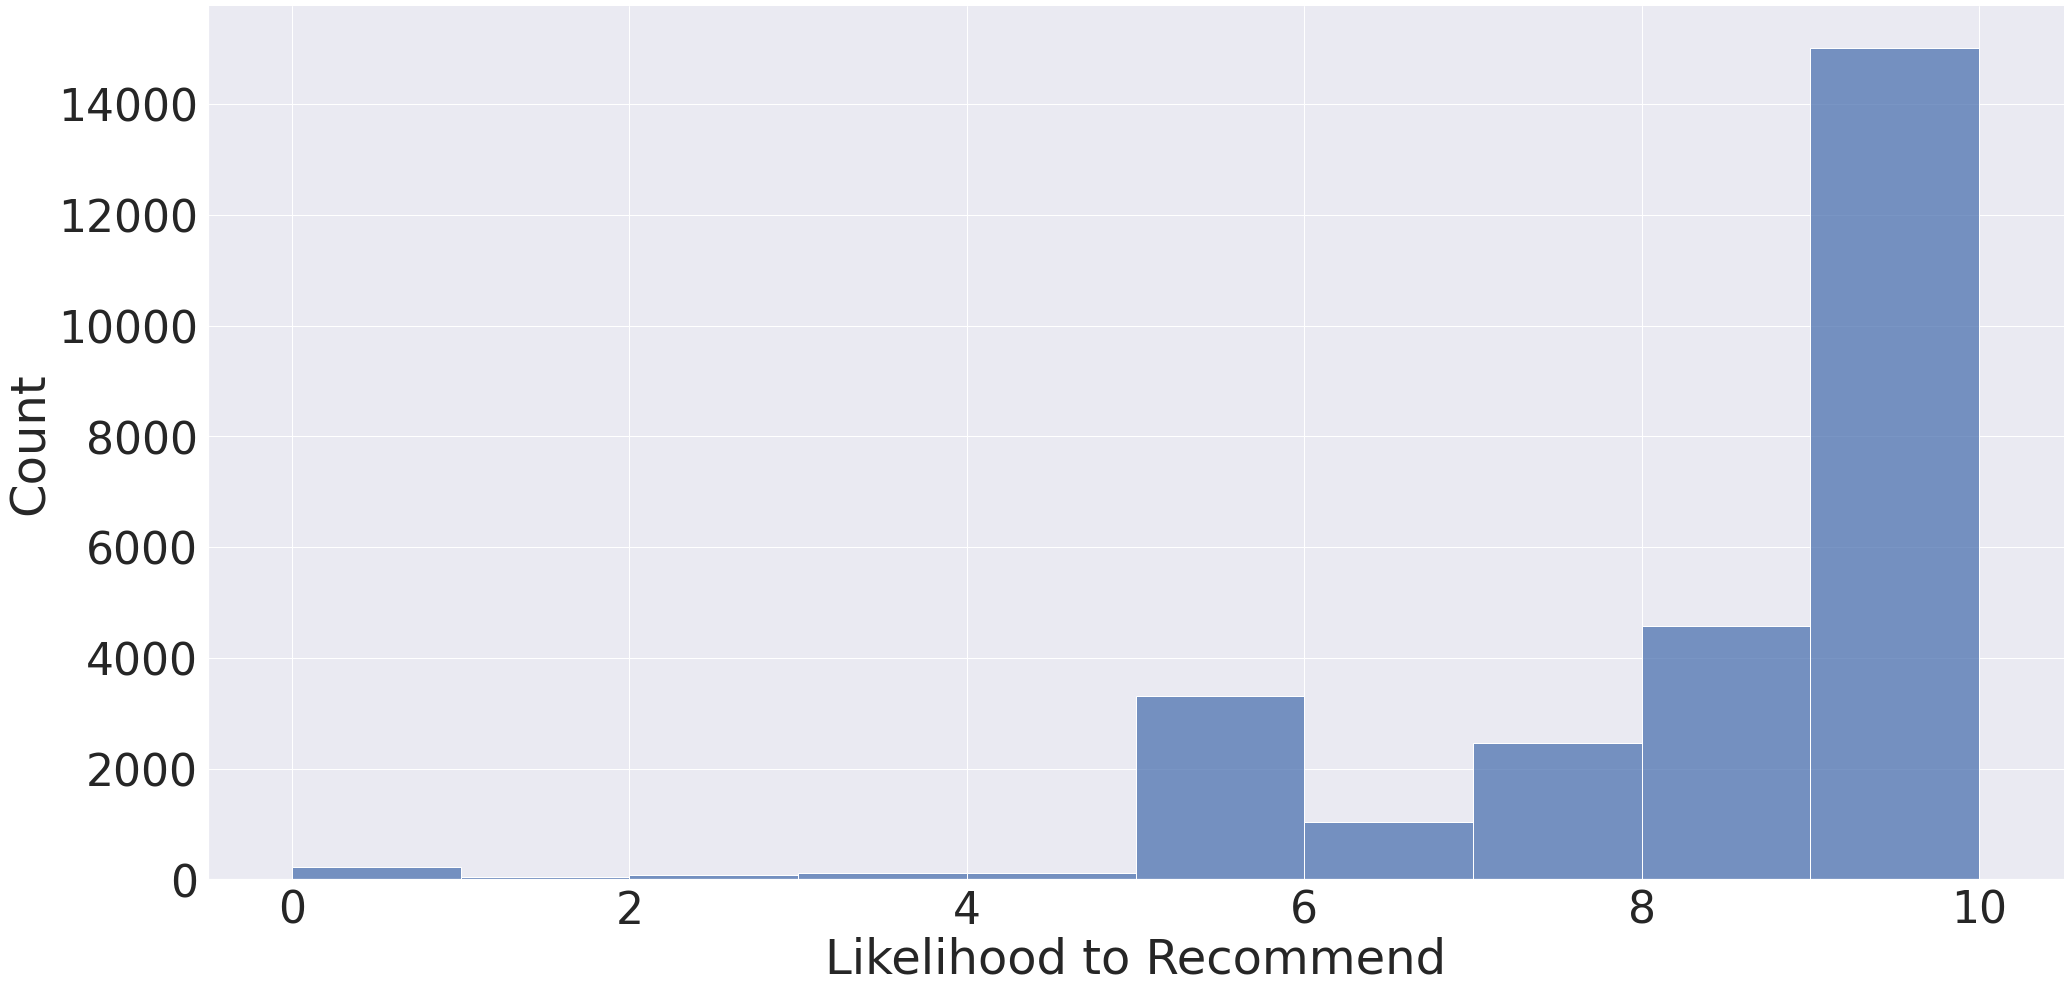

In [ ]:
sns.set(font_scale=4)
sns.displot(df_max_pms, x="Likelihood to Recommend", binwidth=1, height = 15, aspect = 2)

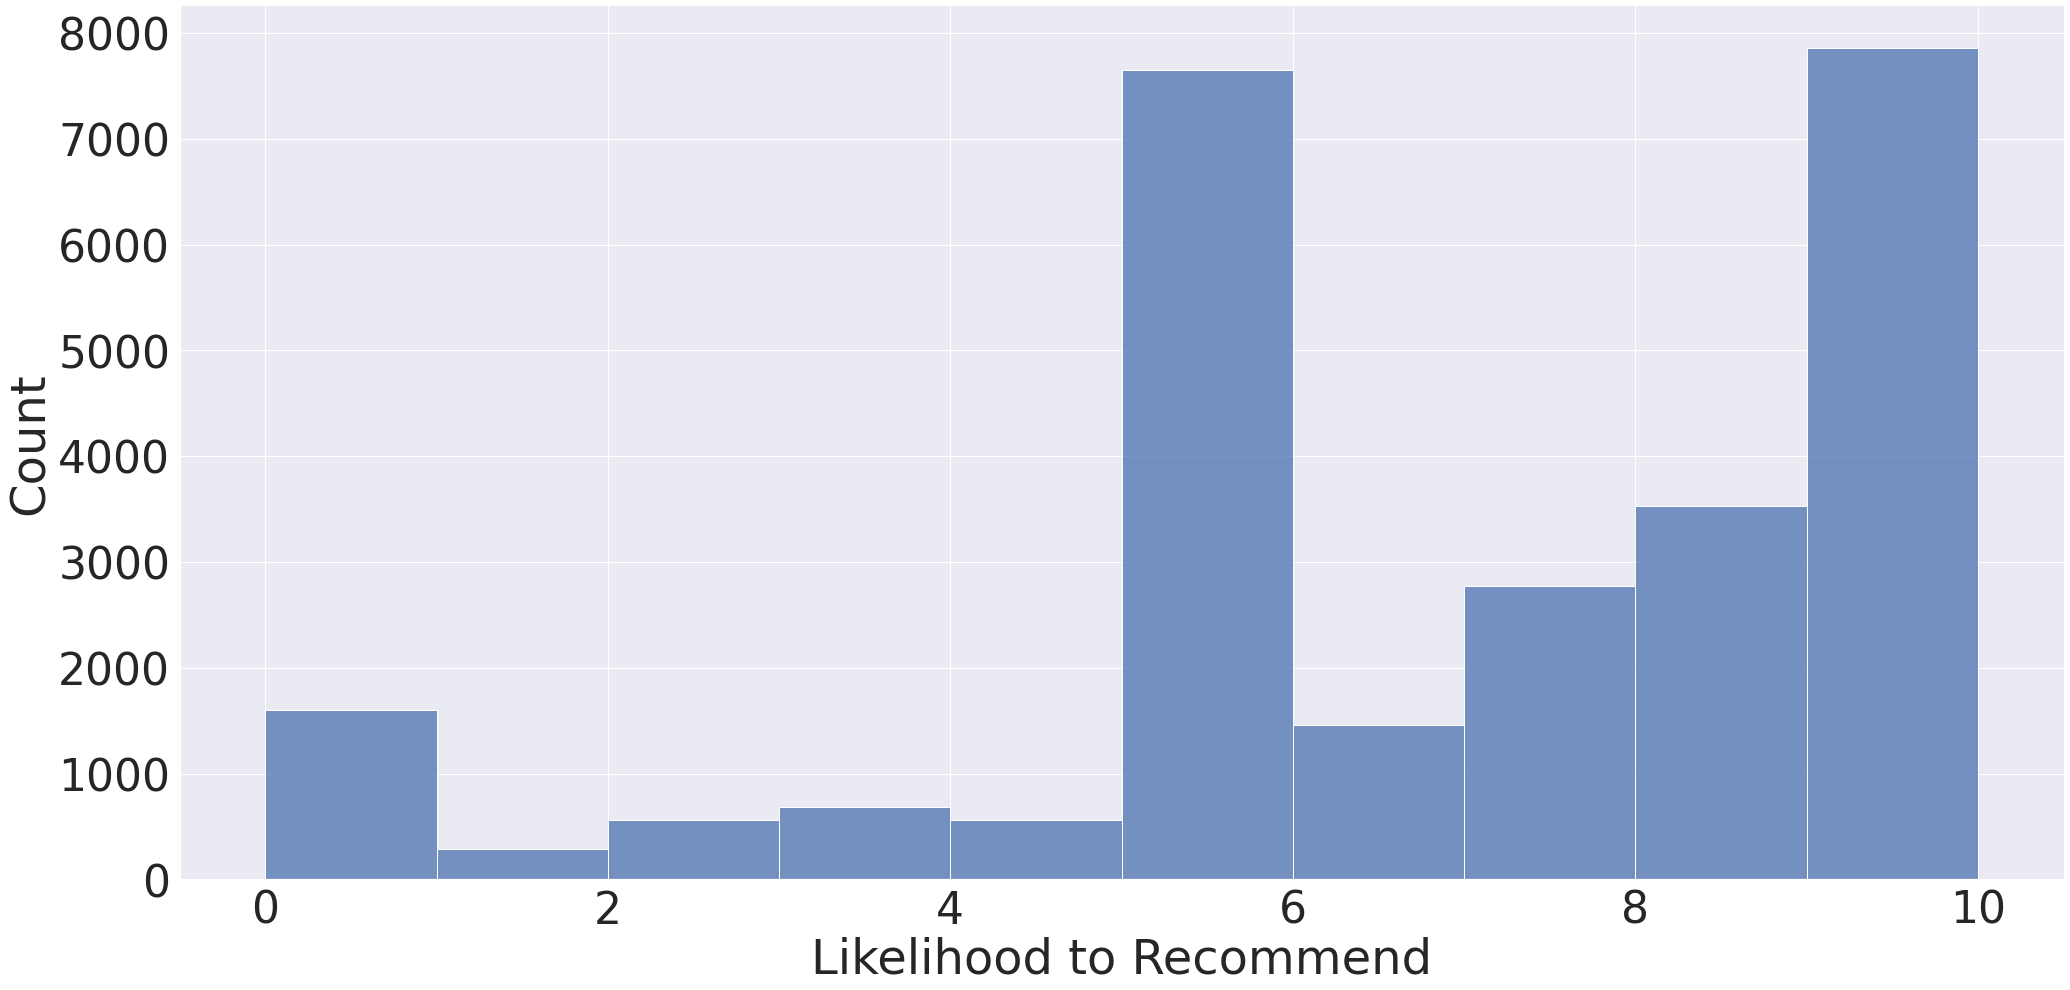

In [ ]:
sns.set(font_scale=4)
sns.displot(df_min_pms, x="Likelihood to Recommend", binwidth=1, height = 15, aspect = 2)

# Prediction

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 1 to 41446
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   responseid                                         41445 non-null  object 
 1   Anonymous Company                                  41445 non-null  object 
 2   Industry                                           41445 non-null  object 
 3   Likelihood to Recommend                            41445 non-null  float64
 4   Emotional Relationship 1                           41445 non-null  float64
 5   Emotional Relationship 2                           41445 non-null  float64
 6   Emotional Relationship 3                           41445 non-null  float64
 7   Emotional Relationship 4                           41445 non-null  float64
 8   Emotional Relationship 5                           41445 non-null  float64
 9   Emotio

In [ ]:
df.columns

Index(['responseid', 'Anonymous Company', 'Industry',
       'Likelihood to Recommend', 'Emotional Relationship 1',
       'Emotional Relationship 2', 'Emotional Relationship 3',
       'Emotional Relationship 4', 'Emotional Relationship 5',
       'Emotional Relationship 6', 'Emotional Relationship 7',
       'Emotional Relationship 8', 'Emotional Relationship 9',
       'Emotional Relationship 10', 'Emotional Relationship 11',
       'Emotional Relationship 12', 'Emotional Relationship 13',
       'Emotional Relationship 14', 'Emotional Relationship 15',
       'Emotional Relationship 16', 'Authentic diversity and inclusion ally',
       'Reputation for supporting diversity and inclusion',
       'Authentically engaged in protecting environment',
       'Doing enough to stop spread of COVID',
       'Innovative to meet needs during COVID',
       'Prioritizes employee safety during COVID',
       'Keeps customers informed during COVID',
       'Donated money to COVID efforts', 'Have 

In [ ]:
X = df[['Emotional Relationship 1',
       'Emotional Relationship 2', 'Emotional Relationship 3',
       'Emotional Relationship 4', 'Emotional Relationship 5',
       'Emotional Relationship 6', 'Emotional Relationship 7',
       'Emotional Relationship 8', 'Emotional Relationship 9',
       'Emotional Relationship 10', 'Emotional Relationship 11',
       'Emotional Relationship 12', 'Emotional Relationship 13',
       'Emotional Relationship 14', 'Emotional Relationship 15',
       'Emotional Relationship 16', 'Authentic diversity and inclusion ally',
       'Reputation for supporting diversity and inclusion',
       'Authentically engaged in protecting environment',
       'Doing enough to stop spread of COVID',
       'Innovative to meet needs during COVID',
       'Prioritizes employee safety during COVID',
       'Keeps customers informed during COVID',
       'Donated money to COVID efforts']]
y = df[['Have recommended']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


In [ ]:
plot(y)

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train.values.ravel())
score = logisticRegr.score(X_test, y_test.values.ravel())
print(score)

0.7100945763366145


In [ ]:
print(f1_score(y_test, logisticRegr.predict(X_test), average="macro"))
print(precision_score(y_test, logisticRegr.predict(X_test), average="macro"))
print(recall_score(y_test, logisticRegr.predict(X_test), average="macro"))

0.7058826886518027
0.7074832739410024
0.7051035443555046


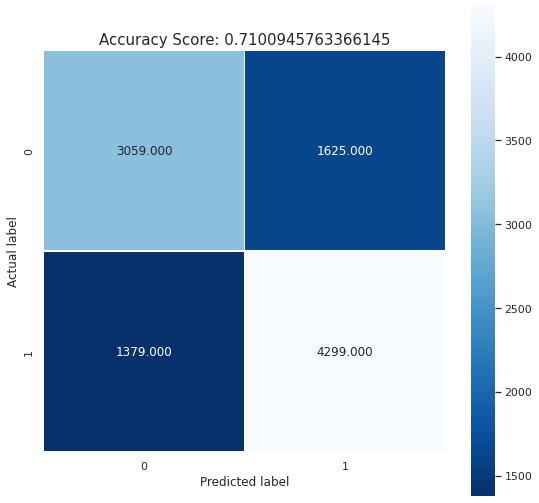

In [ ]:
cm = metrics.confusion_matrix(y_test, logisticRegr.predict(X_test))
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
from sklearn.model_selection import GridSearchCV

PARAMETERS = {"subsample": [0.5, 0.75, 1],
              "max_depth": [2, 6, 12],
              "min_child_weight": [1,5,15],
              "learning_rate": [0.3, 0.1, 0.03], "n_estimators": [100]}


model = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
model_gs = GridSearchCV(model,param_grid=PARAMETERS,cv=3,scoring="accuracy")
model_gs.fit(X_train,y_train.values.ravel(),eval_metric="error",verbose=4)

print(model_gs.best_params_)

{'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.75}


In [ ]:
model_final = xgb.XGBClassifier(learning_rate = 0.03, 
                                max_depth = 6, 
                                min_child_weight = 1,
                                subsample = 0.75, 
                                n_estimators=100, 
                                n_jobs=-1)
model_final.fit(X_train,y_train.values.ravel(),eval_metric="error",verbose=4)


XGBClassifier(learning_rate=0.03, max_depth=6, n_jobs=-1, subsample=0.75)

In [ ]:
y_pred = model_final.predict(X_test)

In [ ]:
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))
print(accuracy_score(y_test, y_pred))

0.7082814042084487
0.7165558990430206
0.7069005230609761
0.7160779772244741


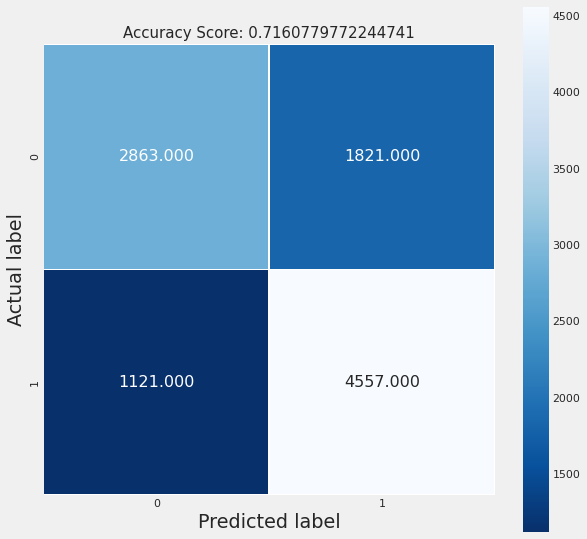

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);

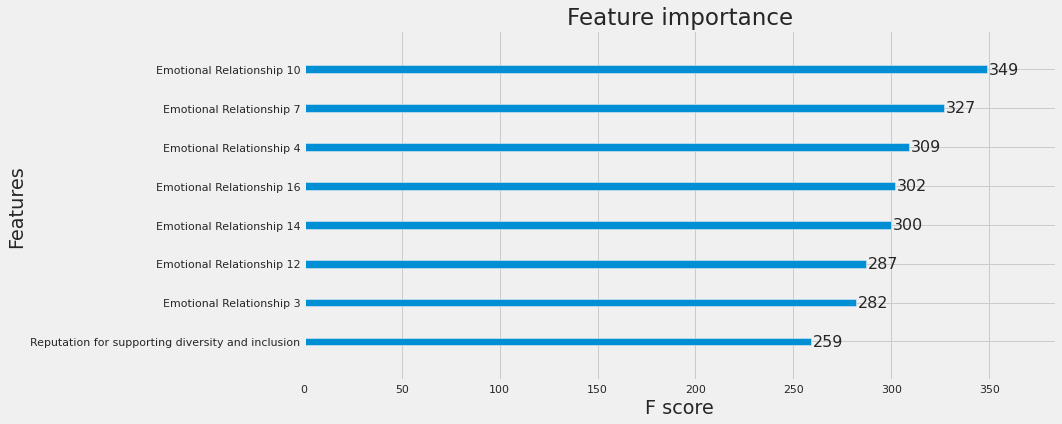

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(model_final._Booster, max_num_features=8, ax=ax)
plt.show();

# Open End Analysis

In [ ]:
df_open_end = df.copy()
df_open_end.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 1 to 41446
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   responseid                                         41445 non-null  object 
 1   Anonymous Company                                  41445 non-null  object 
 2   Industry                                           41445 non-null  object 
 3   Likelihood to Recommend                            41445 non-null  float64
 4   Emotional Relationship 1                           41445 non-null  float64
 5   Emotional Relationship 2                           41445 non-null  float64
 6   Emotional Relationship 3                           41445 non-null  float64
 7   Emotional Relationship 4                           41445 non-null  float64
 8   Emotional Relationship 5                           41445 non-null  float64
 9   Emotio

In [ ]:
df_open_end_positive = df_open_end.dropna(subset = ["Have recommended - open end"])
df_open_end_negative = df_open_end.dropna(subset = ["Have discouraged - open end"])


In [ ]:
df_open_end_positive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22441 entries, 2 to 41445
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   responseid                                         22441 non-null  object 
 1   Anonymous Company                                  22441 non-null  object 
 2   Industry                                           22441 non-null  object 
 3   Likelihood to Recommend                            22441 non-null  float64
 4   Emotional Relationship 1                           22441 non-null  float64
 5   Emotional Relationship 2                           22441 non-null  float64
 6   Emotional Relationship 3                           22441 non-null  float64
 7   Emotional Relationship 4                           22441 non-null  float64
 8   Emotional Relationship 5                           22441 non-null  float64
 9   Emotio

In [ ]:
df_open_end_negative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4852 entries, 7 to 41442
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   responseid                                         4852 non-null   object 
 1   Anonymous Company                                  4852 non-null   object 
 2   Industry                                           4852 non-null   object 
 3   Likelihood to Recommend                            4852 non-null   float64
 4   Emotional Relationship 1                           4852 non-null   float64
 5   Emotional Relationship 2                           4852 non-null   float64
 6   Emotional Relationship 3                           4852 non-null   float64
 7   Emotional Relationship 4                           4852 non-null   float64
 8   Emotional Relationship 5                           4852 non-null   float64
 9   Emotion

We would not need a sentiment analysis kind of an approach since responses are already classified. In this analysis, the focus will be on observing commonly occuring words and phrases to isolate common issues for everyone.

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))


In [ ]:
configure_plotly_browser_state()
all_words = df_open_end_positive['Have recommended - open end'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 (Uncleaned) Word frequencies in the positive dataset'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')


In [ ]:
configure_plotly_browser_state()
all_words = df_open_end_negative['Have discouraged - open end'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 (Uncleaned) Word frequencies in the negatvie dataset'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')


In [ ]:
first_text = df_open_end_positive["Have recommended - open end"].values[0]
print(first_text)
print("="*90)
print(first_text.split(" "))

I have a great Google printer. Easy to load paper. Hasn't yet broken down.
['I', 'have', 'a', 'great', 'Google', 'printer.', 'Easy', 'to', 'load', 'paper.', "Hasn't", 'yet', 'broken', 'down.']


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
nltk.download('wordnet')first_text_list = nltk.word_tokenize(first_text)
print(first_text_list)

['I', 'have', 'a', 'great', 'Google', 'printer', '.', 'Easy', 'to', 'load', 'paper', '.', 'Has', "n't", 'yet', 'broken', 'down', '.']


In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
len(stopwords)

179

In [ ]:
first_text_list_cleaned = [word for word in first_text_list if word.lower() not in stopwords]
print(first_text_list_cleaned)
print("="*90)
print("Length of original list: {0} words\n"
      "Length of list after stopwords removal: {1} words"
      .format(len(first_text_list), len(first_text_list_cleaned)))

['great', 'Google', 'printer', '.', 'Easy', 'load', 'paper', '.', "n't", 'yet', 'broken', '.']
Length of original list: 18 words
Length of list after stopwords removal: 12 words


In [ ]:
from nltk.stem import WordNetLemmatizer
stemmer = nltk.stem.PorterStemmer()
lemm = WordNetLemmatizer()
print("The lemmatized form of salads is: {}".format(lemm.lemmatize("salads")))

The lemmatized form of salads is: salad


In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [ ]:
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))

In [86]:
text = list(df_open_end_positive["Have recommended - open end"].values)
text = [str (item) for item in text]
text = [item for item in text if not isinstance(item, int)]

# Calling our overwritten Count vectorizer
tf_vectorizer = LemmaCountVectorizer(max_df=0.95, 
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf = tf_vectorizer.fit_transform(text)

In [82]:
text_negative = list(df_open_end_negative["Have discouraged - open end"].values)
text_negative = [str (item) for item in text_negative]
text_negative = [item for item in text_negative if not isinstance(item, int)]

# Calling our overwritten Count vectorizer
tf_vectorizer_negative = LemmaCountVectorizer(max_df=0.95, 
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf_negative = tf_vectorizer_negative.fit_transform(text_negative)

In [87]:
configure_plotly_browser_state()
feature_names = tf_vectorizer.get_feature_names()
count_vec = np.asarray(tf.sum(axis=0)).ravel()
zipped = list(zip(feature_names, count_vec))
x, y = (list(x) for x in zip(*sorted(zipped, key=lambda x: x[1], reverse=True)))
# Now I want to extract out on the top 15 and bottom 15 words
Y = np.concatenate([y[0:15], y[-16:-1]])
X = np.concatenate([x[0:15], x[-16:-1]])

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[0:50],
            y = y[0:50],
            marker= dict(colorscale='Jet',
                         color = y[0:50]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 Word frequencies after Preprocessing, Positive'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[-100:],
            y = y[-100:],
            marker= dict(colorscale='Portland',
                         color = y[-100:]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Bottom 100 Word frequencies after Preprocessing, Positive'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [84]:
configure_plotly_browser_state()
feature_names = tf_vectorizer_negative.get_feature_names()
count_vec = np.asarray(tf_negative.sum(axis=0)).ravel()
zipped = list(zip(feature_names, count_vec))
x, y = (list(x) for x in zip(*sorted(zipped, key=lambda x: x[1], reverse=True)))
# Now I want to extract out on the top 15 and bottom 15 words
Y = np.concatenate([y[0:15], y[-16:-1]])
X = np.concatenate([x[0:15], x[-16:-1]])

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[0:50],
            y = y[0:50],
            marker= dict(colorscale='Jet',
                         color = y[0:50]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 Word frequencies after Preprocessing, Negative'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[-100:],
            y = y[-100:],
            marker= dict(colorscale='Portland',
                         color = y[-100:]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Bottom 100 Word frequencies after Preprocessing, Negative'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Positive words


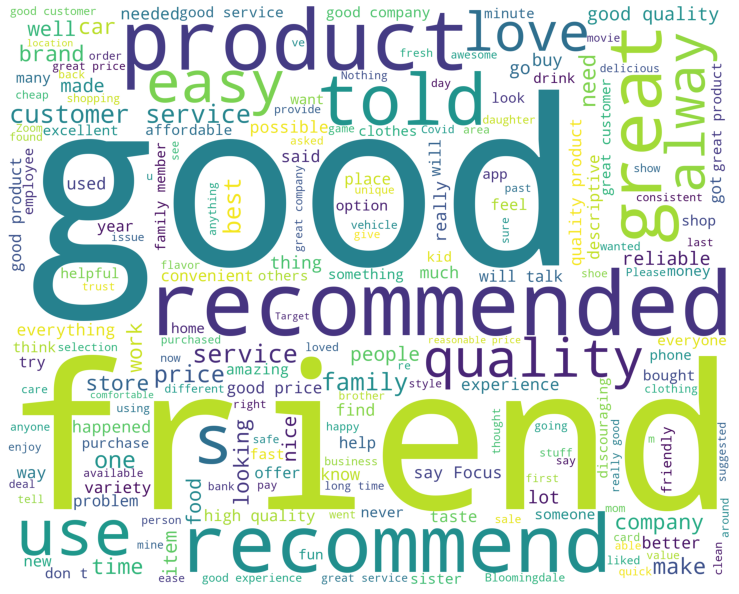

Negative words


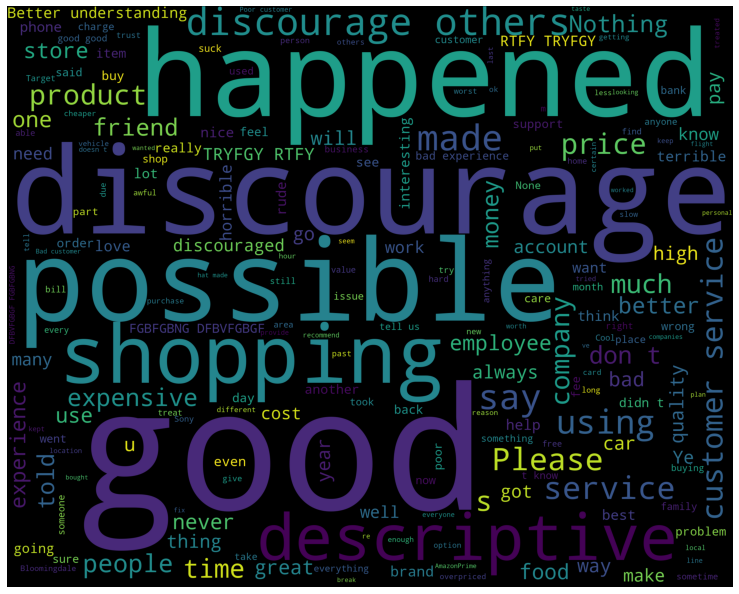

In [89]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(text,'white')
print("Negative words")
wordcloud_draw(text_negative)